# Logestic Regression
### Author: Ehsan Gharib-Nezhad



In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# # Imbalance data Handling ___________________________________________________
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

from myfunctions import *

In [2]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced_v2.csv')
is_balanced = False # set True is the dataset is balanced!!! 

In [3]:
df.head(3)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp,post,post2,stemmed,is_Covid19positive
0,I am constantly seeing people asking about people’s experiences so I figured now we can go to one place and stop spamming the AMA and ask Reddit’s subs.,For those that have tested positive I hope every single one of you feels better soon!,COVID19positive,1584148032,the1andonlyjoja,191,1,True,2020-03-13 18:07:12,For those that have tested positive I hope every single one of you feels better soon,For tested positive I hope every single one feels better soon,for test posit i hope everi singl one feel better soon,1
1,How severe are your guys' symptoms?,"I have no idea if I've got the coronavirus, or it's just a cold etc. I've got a runny nose and coughing quite a lot, and a bit of a headache. I don't want to go out in case I do have it and I give it to other people. Are your symptoms debilitating?",COVID19positive,1584358828,RocketFrasier,0,1,True,2020-03-16 04:40:28,I have no idea if I ve got the coronavirus or it s just a cold etc I ve got a runny nose and coughing quite a lot and a bit of a headache I don t want to go out in case I do have it and I give it to other people Are your symptoms debilitating,I idea I got coronavirus cold etc I got runny nose coughing quite lot bit headache I want go case I I give people Are symptoms debilitating,i idea i got coronaviru cold etc i got runni nose cough quit lot bit headach i want go case i i give peopl are symptom debilit,1
2,How severe are your symptoms?,"I have no idea if I've got the coronavirus, or it's just a cold etc. I've got a runny nose and coughing quite a lot, and a bit of a headache. I don't want to go out in case I do have it and I give it to other people. My symptoms feel practically the same as a normal cold/flu, other than last night where my eyes hurt a bit, so I wasn't able to sleep. Are your symptoms debilitating?",COVID19positive,1584358937,RocketFrasier,42,1,True,2020-03-16 04:42:17,I have no idea if I ve got the coronavirus or it s just a cold etc I ve got a runny nose and coughing quite a lot and a bit of a headache I don t want to go out in case I do have it and I give it to other people My symptoms feel practically the same as a normal cold flu other than last night where my eyes hurt a bit so I wasn t able to sleep Are your symptoms debilitating,I idea I got coronavirus cold etc I got runny nose coughing quite lot bit headache I want go case I I give people My symptoms feel practically normal cold flu last night eyes hurt bit I able sleep Are symptoms debilitating,i idea i got coronaviru cold etc i got runni nose cough quit lot bit headach i want go case i i give peopl my symptom feel practic normal cold flu last night eye hurt bit i abl sleep are symptom debilit,1


### Set up X and Y

In [4]:
X = df['stemmed']
y = df['is_Covid19positive']

In [5]:
#check baseline:

y.value_counts(normalize = True)

1    0.929298
0    0.070702
Name: is_Covid19positive, dtype: float64

## __Note__: This dataset is unbalanced and so the classification results are expected to be affected by this issue! To improve this, RandomOverSampler is used.

#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
# Model 1: Using `RandomForestClassifier` training procedure with default parameters

steps:
1. train test split
2. count vectorizer
3. RandomOverSampler
4. train LogisticRegression model
5. check Feature Coefficients/importnace for selecting them
6. assess classification results

### train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    shuffle=True,
                                                    random_state = 42)

In [9]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929288
 0    0.070712
 Name: is_Covid19positive, dtype: float64,
 1    0.929331
 0    0.070669
 Name: is_Covid19positive, dtype: float64)


### Use count vectorizer

In [10]:
cvec = CountVectorizer()

In [11]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test  = cvec.transform(X_test)

### For imbalanced case

In [12]:
ros = RandomOverSampler()

Xcv_train_balanced , y_train_balanced = ros.fit_resample(Xcv_train, y_train)

In [13]:
# The y_train dataset is balanced now!!!
y_train_balanced.value_counts()

1    23077
0    23077
Name: is_Covid19positive, dtype: int64

### Apply LogisticRegression

In [14]:
rf_1 = RandomForestClassifier(n_estimators=100, random_state = 42)

In [15]:
rf_1.fit(Xcv_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# accuracy
rf_1.score(Xcv_train, y_train), rf_1.score(Xcv_test, y_test)

(0.9995973100310072, 0.9682290408311186)

# Confusion Matrix

Score on training set: 0.9995973100310072
Score on testing set: 0.9682290408311186
              precision    recall  f1-score   support

           0       0.96      0.57      0.72       585
           1       0.97      1.00      0.98      7693

    accuracy                           0.97      8278
   macro avg       0.97      0.79      0.85      8278
weighted avg       0.97      0.97      0.96      8278



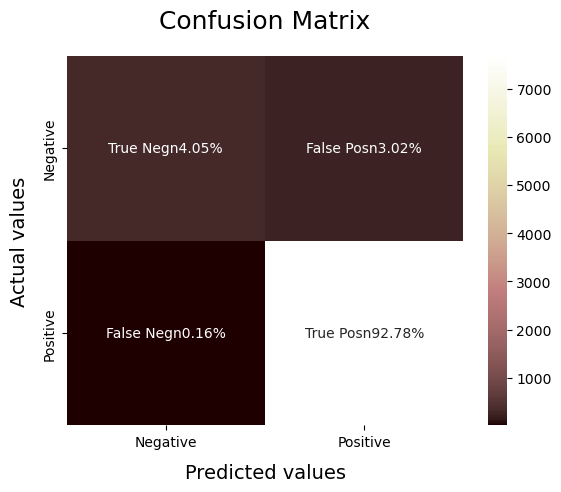

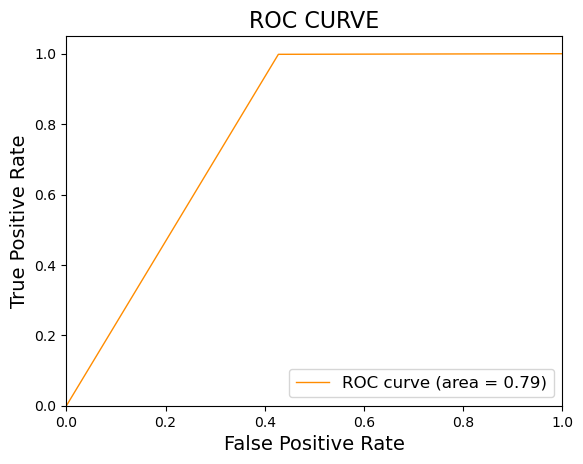

In [17]:
# View confusion matrix
model_Evaluate(rf_1, Xcv_train, Xcv_test, y_train, y_test)

# Plot Feature Coefficient

In [18]:
#create a dataframe for our X_train_cv to use later:

df_features = pd.DataFrame(Xcv_train_balanced.todense(), columns=cvec.get_feature_names())

In [19]:
df_features.head(5)

,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaachooooooo,aahhh,ab,aback,abain,abandon,abat,...,zuchinni,zuckersaid,zuid,zumba,zurich,zwift,zybio,zyrtec,zz,zzzquil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Note__: This model is trained using 19,878 features!!! In this following, the importnace of these features are investigated. 

In [20]:
f = {'Feature Name':df_features.columns,'Feature Coefficient':rf_1.feature_importances_}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Coefficient'], ascending = False).head(1000)

,Feature Name,Feature Coefficient
13455,prep,0.041016
16455,stock,0.018675
2443,buy,0.013401
16923,symptom,0.012599
16766,suppli,0.012405
...,...,...
5347,ebay,0.000181
835,anywher,0.000181
2041,book,0.000180
13180,polici,0.000180


In [21]:
selected_features = fi.sort_values(by=['Feature Coefficient'], ascending = False).head(10000)['Feature Coefficient']
selected_features

13455    0.041016
16455    0.018675
2443     0.013401
16923    0.012599
16766    0.012405
           ...   
14755    0.000000
1242     0.000000
14753    0.000000
14752    0.000000
14751    0.000000
Name: Feature Coefficient, Length: 10000, dtype: float64

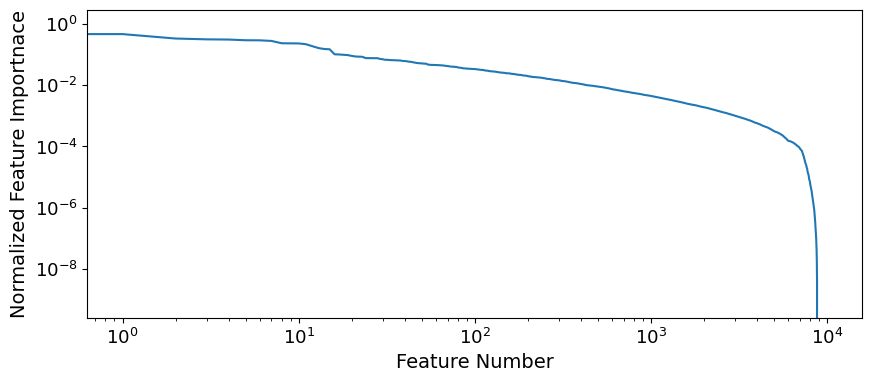

In [22]:
plt.figure( figsize=(10,4))
plt.loglog( range(len(selected_features)), selected_features/max(selected_features) )
plt.xlabel('Feature Number',fontsize=14)
plt.ylabel('Normalized Feature Importnace', fontsize = 14)
plt.tick_params('both', labelsize = 13)

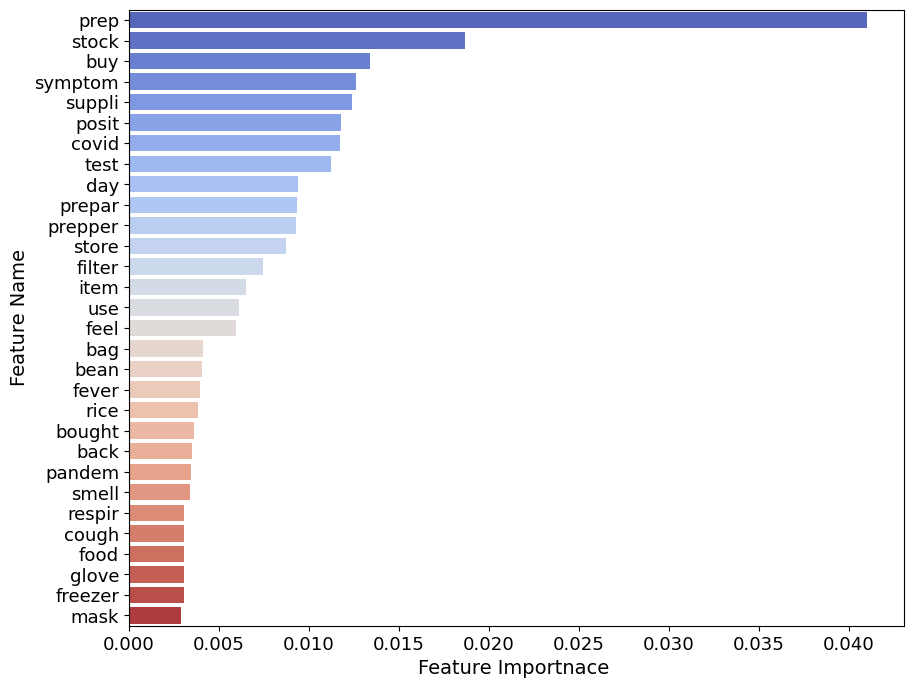

In [23]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[0:30],
            palette='coolwarm')
plt.xlabel('Feature Importnace ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

__Figure Caption__: Words like _posit_ (i.e., positive), _covid_, _poll_, _contract_, and _symptom_ are the top words/features that are used to discrimiate between posts from subReddit Covid19Positive vs. PandemicPrep.    

### 
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# RandomForestClassifier model with feature selection

In [24]:
dic = {}
for top_features_num in [10, 100, 500, 1000, 5000]:#, 8000, 9000, 10_000, 12_000, 15_000, 19_000]:
    top_features = list(fi.sort_values(by=['Feature Coefficient'], ascending = False).head(top_features_num)['Feature Name'].values)
    Xcv_train_2 = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())[top_features]
    Xcv_test_2 = pd.DataFrame(Xcv_test.todense(), columns=cvec.get_feature_names())[top_features]
    #
    ros = RandomOverSampler()
    Xcv_train_balanced2 , y_train_balanced2 = ros.fit_resample(Xcv_train_2, y_train)
    #
    RF_2 = RandomForestClassifier(n_estimators=100, random_state = 42)
    RF_2.fit(Xcv_train_balanced2, y_train_balanced2)
    
    dic[top_features_num] = ( round(RF_2.score(Xcv_train_balanced2, y_train_balanced2),2), round(RF_2.score(Xcv_test_2, y_test), 2) )

    print(top_features_num, dic[top_features_num])

10 (0.89, 0.84)
100 (0.99, 0.95)
500 (1.0, 0.97)
1000 (1.0, 0.97)
5000 (1.0, 0.97)


<Figure size 1500x400 with 0 Axes>

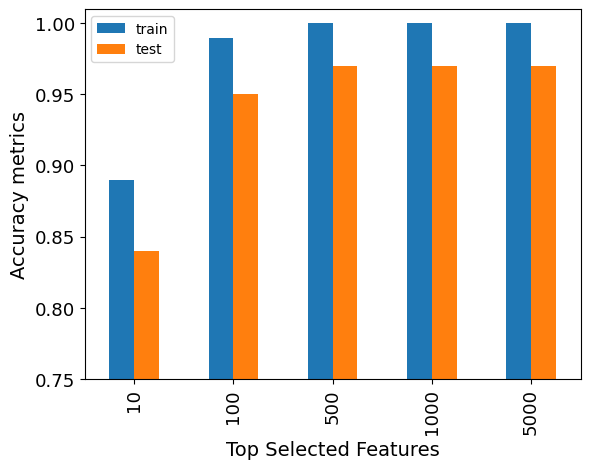

In [26]:
# conver the train-test dictionary to dataFrame
df = pd.DataFrame(data = dic).T

plt.figure( figsize=(15,4))
df.rename(columns = {0:'train', 1:'test'}, inplace=True)
# plot grouped bar chart
df.plot(kind="bar")
plt.ylim((.75,1.01))
plt.xlabel('Top Selected Features',fontsize=14)
plt.ylabel('Accuracy metrics', fontsize = 14)
plt.tick_params('both', labelsize = 13);

# Confusion Matrix

Score on training set: 0.9989166702777658
Score on testing set: 0.9693162599661754
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       585
           1       0.97      0.99      0.98      7693

    accuracy                           0.97      8278
   macro avg       0.93      0.83      0.87      8278
weighted avg       0.97      0.97      0.97      8278



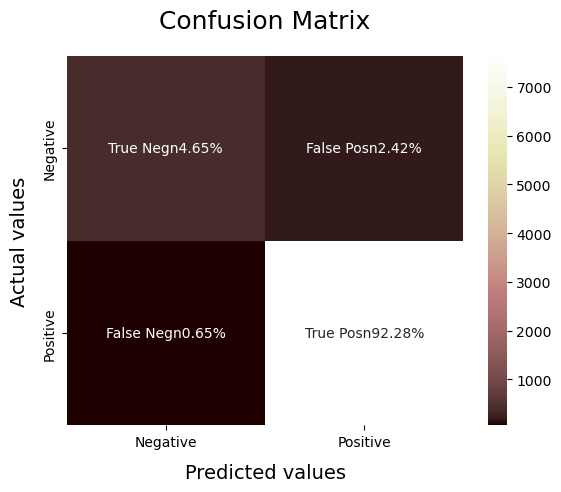

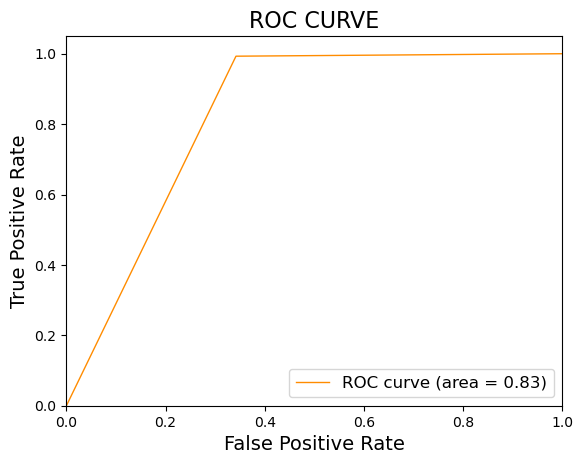

In [27]:
# View confusion matrix
model_Evaluate(RF_2, Xcv_train_balanced2, Xcv_test_2, y_train_balanced2, y_test)

#
# * * * * * 
# PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [29]:
pca_model = TruncatedSVD(n_components = 100, random_state=42)
pca = pca_model.fit(Xcv_train_balanced)
Xcv_train_balanced_pca = pca.transform(Xcv_train_balanced)
Xcv_test_pca = pca.transform(Xcv_test)

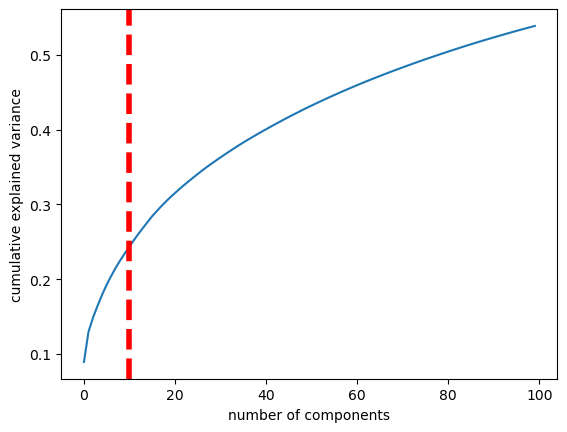

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.089320,0.089320
1,0.129683,0.040363
2,0.148725,0.019042
3,0.164555,0.015829
4,0.179358,0.014803
5,0.192747,0.013390
6,0.204465,0.011718
7,0.215492,0.011027
8,0.225400,0.009907
9,0.234812,0.009412


In [30]:
plt.figure()
#             sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_model.explained_variance_ratio_
cvr = np.cumsum(pca_model.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [31]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_model.components_, index=pca_dims)
display(pca_test_df.head(10).T)
plt.show();

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
0,0.000169,-0.000752,0.000191,0.000804,0.000027,-9.987652e-05,-0.000457,3.798258e-04,-0.001685,3.137943e-04
1,0.000167,-0.000754,0.000192,0.000805,0.000027,-9.911603e-05,-0.000451,3.853987e-04,-0.001681,3.099705e-04
2,0.000001,0.000002,0.000008,-0.000002,-0.000003,-6.908890e-07,0.000001,-1.420438e-08,-0.000007,1.340790e-07
3,0.000119,-0.000154,-0.000050,-0.000342,-0.000180,2.049774e-05,0.000124,8.046137e-05,-0.000153,-1.915202e-05
4,0.000004,0.000010,0.000003,0.000002,0.000011,1.749951e-06,-0.000033,1.998455e-05,0.000007,-2.305225e-06
...,...,...,...,...,...,...,...,...,...,...
19873,0.000004,0.000005,-0.000009,0.000002,0.000005,-1.247911e-06,-0.000005,-7.090759e-06,-0.000007,1.425421e-05
19874,0.000003,0.000007,-0.000009,0.000017,0.000004,1.693109e-06,0.000013,1.741529e-05,0.000018,-1.463342e-05
19875,0.000410,0.000411,0.000201,0.000007,-0.000136,-1.075393e-05,0.000089,-3.520266e-04,-0.000315,1.676982e-04
19876,0.000012,-0.000016,-0.000053,-0.000019,0.000001,4.513129e-06,-0.000015,-2.442012e-05,0.000061,1.893639e-04


In [32]:
# Xcv_train_balanced_pca[:10]

In [33]:
dic_pca = {}
for top_pca_components in [1, 2, 5, 10, 15, 20, 30, 50, 100]:
    pca_model = TruncatedSVD(n_components = top_pca_components, random_state=42)
    pca = pca_model.fit(Xcv_train_balanced)
    Xcv_train_balanced_pca = pca.transform(Xcv_train_balanced)
    Xcv_test_pca = pca.transform(Xcv_test)

    RF_pca = RandomForestClassifier(n_estimators=100, random_state = 42)
    RF_pca.fit(Xcv_train_balanced_pca, y_train_balanced)
    
    dic_pca[top_pca_components] = ( round(RF_pca.score(Xcv_train_balanced_pca, y_train_balanced),2), 
                                    round(RF_pca.score(Xcv_test_pca, y_test), 2) )

    print(top_pca_components, dic_pca[top_pca_components])

1 (1.0, 0.88)
2 (1.0, 0.95)
5 (1.0, 0.96)
10 (1.0, 0.96)
15 (1.0, 0.96)
20 (1.0, 0.96)
30 (1.0, 0.96)
50 (1.0, 0.97)
100 (1.0, 0.96)


<Figure size 1500x400 with 0 Axes>

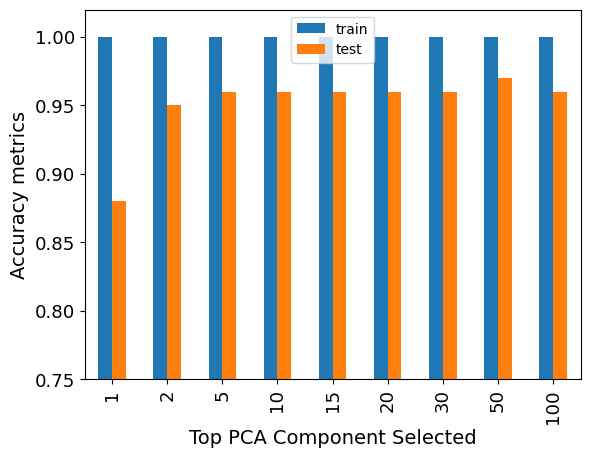

In [34]:
# conver the train-test dictionary to dataFrame
df = pd.DataFrame(data = dic_pca).T

plt.figure( figsize=(15,4))
df.rename(columns = {0:'train', 1:'test'}, inplace=True)
# plot grouped bar chart
df.plot(kind="bar")
plt.ylim((.75,1.02))
plt.xlabel('Top PCA Component Selected',fontsize=14)
plt.ylabel('Accuracy metrics', fontsize = 14)
plt.tick_params('both', labelsize = 13)

__Figure Caption__: By using 1000 components of PCA, we could increase the train and test accuracy scores up to 99% and 96%.

# Confusion Matrix

Score on training set: 0.9989383368722105
Score on testing set: 0.9630345494080695
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       585
           1       0.97      0.99      0.98      7693

    accuracy                           0.96      8278
   macro avg       0.90      0.80      0.84      8278
weighted avg       0.96      0.96      0.96      8278



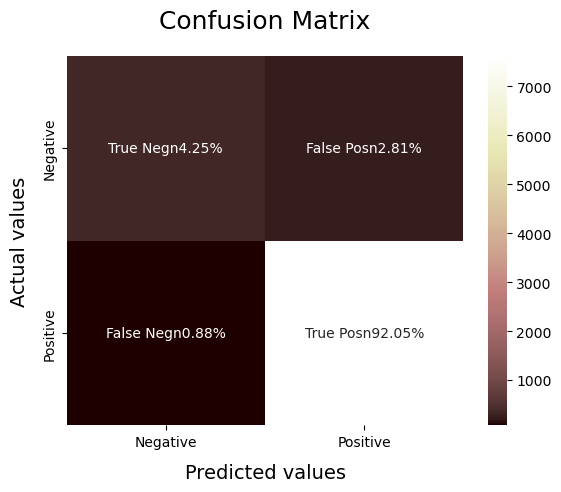

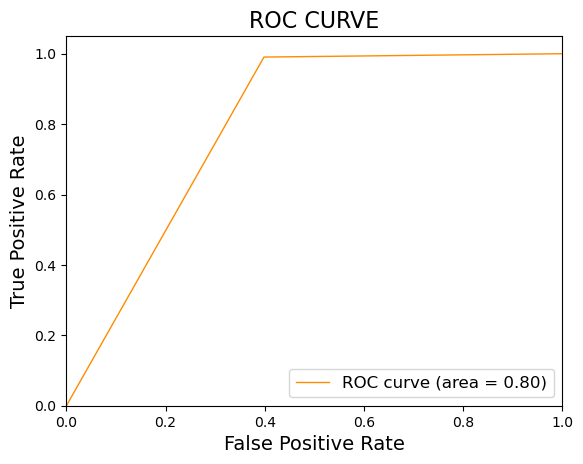

In [35]:
# View confusion matrix
model_Evaluate(RF_pca, Xcv_train_balanced_pca, Xcv_test_pca, y_train_balanced, y_test)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

# Gridsearch

In [36]:
# Define dictionary of hyperparameters.
pipe_params = {  'n_estimators':[100, 500, 1000, 2000], 
                 'max_features': ['sqrt', 'log2'],
                 'min_samples_split' : [2, 4, 8]

              }

In [37]:
gs = GridSearchCV(RandomForestClassifier(random_state=42), pipe_params, cv = 5)

In [ ]:
gs.fit(Xcv_train_balanced_pca, y_train_balanced)

In [ ]:
gs.score(Xcv_train_balanced_pca, y_train_balanced), gs.score(Xcv_test_pca, y_test)

In [ ]:
gs.best_params_

# Confusion Matrix

In [ ]:
model_Evaluate(gs, Xcv_train_balanced_pca, Xcv_test_pca, y_train_balanced, y_test)